In [1]:
# Folder where jpq/ is installed
containing_folder = '/home/scott/Desktop'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

In [3]:
def complexColor(z):
    # Converts magnitude and phase to a standard RGB triple (between 0 and 1)
    # Use standard mapping of magnitude and phase to HSL (H = phase, L = magnitude, S = 1)
    # Then map HSL to RGB and return a triple
    # Magnitude assumed not greater than 1
    
    norm = np.abs(z)
    phase = np.angle(z)
    
    C = 1 - abs(2*norm - 1)
    H = phase/(np.pi / 3) # Finds which of the 6 sections of the color wheel the phase belongs to
    X = C * (1 - abs((H % 2) - 1))
    
    # 6 cases corresponding to the 6 sections
    if H <= 1:
        R = C
        G = X
        B = 0
    elif H <= 2:
        R = X
        G = C
        B = 0
    elif H <= 3:
        R = 0
        G = C
        B = X
    elif H <= 4:
        R = 0
        G = X
        B = C
    elif H <= 5:
        R = X
        G = 0
        B = C
    elif H <= 6:
        R = C
        G = 0
        B = X
    else:
        R = 0
        G = 0
        B = 0
        
    m = norm - C/2
    
    return (R+m, G+m, B+m)

In [4]:
def phasePlot(num, x, y, scale = 1):
    # NUM is a complex number
    # X and Y are coordinates of the center of the phase diagram
    # SCALE can be used to scale all values as needed (e.g. normalization)
    # Returns a circle that can be plotted

    r = np.abs(num) * scale
    theta = np.angle(num)

    return plt.Circle((x, y), r, color=complexColor(num))

In [5]:
def matrixPhase(matrix):
    # Plot a Hinton diagram of a matrix of complex numbers
    # MATRIX assumed to have complex numbers with magnitude at most 1
    # MATRIX also assumed to be square

    array = np.asarray(matrix)
    dim = array.shape[0]
    rect_coords = [i/dim for i in range(dim+1)]
    figure, axes = plt.subplots()

    # Due to matrix indexing, i controls y-coodinate, j controls x-coordinate
    for i in range(dim):
        for j in range(dim):            
            # Use RECT_COORDS to find centers of the phase diagram circle
            # Alternatively can implement as m x n array with each entry containing a tuple for the center points
            x = (rect_coords[j] + rect_coords[j+1]) / 2
            y = 1 - (rect_coords[i] + rect_coords[i+1]) / 2
            
            theta = np.angle(array[i][j])

            circle = phasePlot(array[i][j], x, y, scale=1/(2*dim)) # Divide by dimension to fit inside assigned square, which is diameter, not radius
            axes.add_patch(circle)
            plt.plot([x, x + np.cos(theta)/(dim**2)], [y, y + np.sin(theta)/(dim**2)], linestyle='-', color='k')
    plt.xlim([0,1])
    plt.ylim([0,1])
    axes.set_aspect('equal', adjustable='datalim') # use adjustable='box' if we want the entire plot to be square
    plt.show()

In [6]:
def matrixPhaseHTML(matrix):
    # Generate a Hinton diagram of a matrix of complex numbers and return the HTML code for it
    # Also returns the HTML for the mapping between phase and color
    # MATRIX assumed to have complex numbers with magnitude at most 1
    # MATRIX also assumed to be square

    array = np.asarray(matrix)
    dim = array.shape[0]
    rect_coords = [i/dim for i in range(dim+1)]
    figure, axes = plt.subplots()

    # Due to matrix indexing, i controls y-coodinate, j controls x-coordinate
    for i in range(dim):
        for j in range(dim):            
            # Use RECT_COORDS to find centers of the phase diagram circle
            # Alternatively can implement as m x n array with each entry containing a tuple for the center points
            x = (rect_coords[j] + rect_coords[j+1]) / 2
            y = 1 - (rect_coords[i] + rect_coords[i+1]) / 2
            
            theta = np.angle(array[i][j])

            circle = phasePlot(array[i][j], x, y, scale=1/(2*dim)) # Divide by dimension to fit inside assigned square, which is diameter, not radius
            axes.add_patch(circle)
            plt.plot([x, x + np.cos(theta)/(dim**2)], [y, y + np.sin(theta)/(dim**2)], linestyle='-', color='k')
    plt.xlim([0,1])
    plt.ylim([0,1])
    axes.set_aspect('equal', adjustable='datalim') # use adjustable='box' if we want the entire plot to be square
    
    tmpfile = BytesIO()
    figure.savefig(tmpfile, format='png')
    data = base64.b64encode(tmpfile.getbuffer()).decode('utf-8')
    return f"<img src='file:///{containing_folder}/jpq/scott/hsl-color-wheel.png'/>" + f"<img src='data:image/png;base64,{data}'/>"

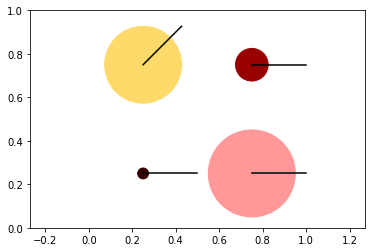

In [7]:
# For testing
matrixPhase([[0.5+0.5j,0.3],[0.1,0.8]])

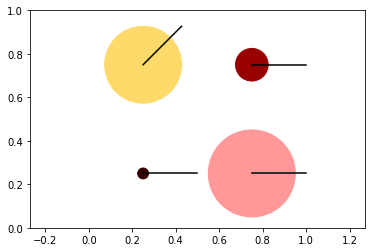

In [8]:
html = matrixPhaseHTML([[0.5+0.5j,0.3],[0.1,0.8]])

"<img src='file:////home/scott/Desktop/jpq/scott/hsl-color-wheel.png'/>"
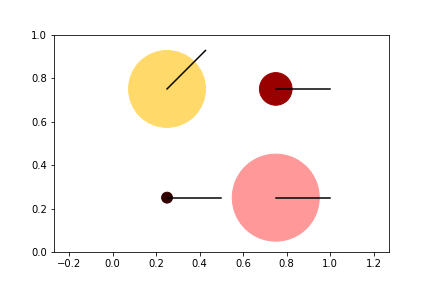

In [9]:
html